In [15]:
import spotipy
import matplotlib
import numpy as np
%matplotlib notebook
from matplotlib import pylab as plt
from matplotlib import mlab
sp = spotipy.Spotify()

In [9]:
results = sp.search(type='playlist', q='punk', limit=50)['playlists']
print "gathering details about", results['total'], "playlists"
punk_playlists = results['items']
while results['next']:
    results = sp.next(results)['playlists']
    punk_playlists += results['items']


gathering details about 5351 playlists


number of results: 5351



<IPython.core.display.Javascript object>


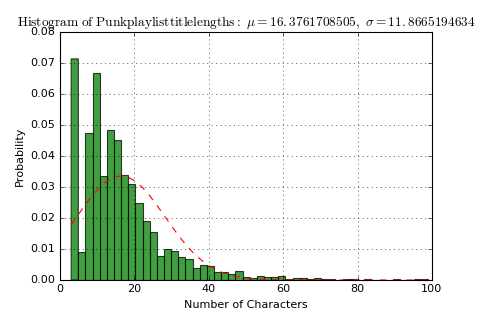

In [23]:
print "number of results:", len(punk_playlists)

print 
title_lengths = filter(lambda c:c<100, map(lambda pl:len(pl['name']), punk_playlists))
n, bins, patches = plt.hist(title_lengths, 50, normed=1, facecolor='green', alpha=0.75)
mu = np.mean(title_lengths)
sigma = np.std(title_lengths)
# add a 'best fit' line
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('Number of Characters')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ Punk playlist title lengths:}\ \mu='+str(mu)+',\ \sigma='+str(sigma)+'$')
# plt.axis([40, 160, 0, 0.03])
plt.grid(True)





In [25]:
from collections import Counter
print "top words in titles"
word_count = Counter()
for pl in punk_playlists:
    word_count.update(pl['name'].split())
word_count.topn(10)

top words in titles


AttributeError: 'Counter' object has no attribute 'topn'